<h1>Regressão Linear - Introdução</h1>

In [9]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns

# O Dataset

Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

# Leitura e Visualização dos Dados

In [10]:
dados = pd.read_csv('src/Consumo_cerveja.csv', delimiter=';')
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [11]:
dados.shape

(365, 7)

# Análises 

## Estatísticas descritivas

In [12]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [13]:
dados.corr().round(2)

C:\Users\lsantana\AppData\Local\Temp\ipykernel_22136\4152181542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados.corr().round(2)


,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


## Comportamento da variável dependente (y)

### Plotando a variável dependente (y)

Text(0.5, 0, 'Dias')

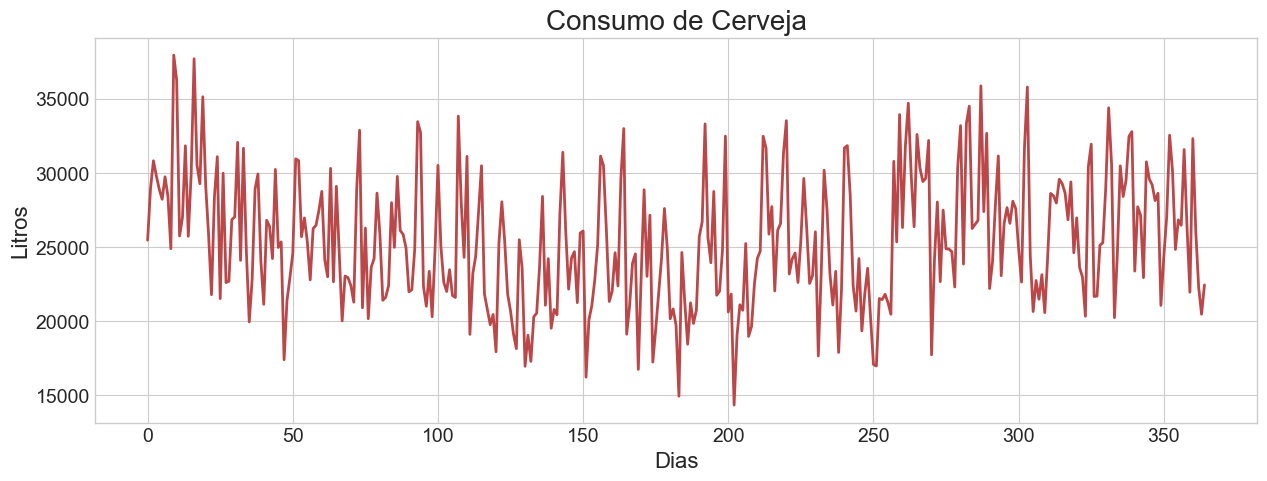

In [14]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(15,5))

ax = dados['consumo'].plot(linewidth = 2, fontsize=14, color='#bc4749')

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)

### Usando Boxplot

<img width='700px' src='src/img/Box-Plot.png'>


#### Boxplot da variável dependente (y)

In [18]:
sns.set_palette('Accent')

Text(0.5, 0, 'Litros')

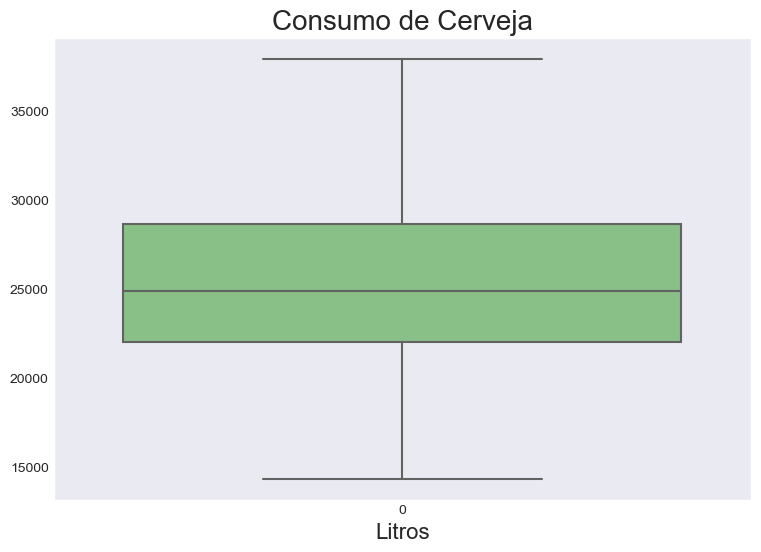

In [16]:
ax = sns.boxplot(data=dados['consumo'])
ax.figure.set_size_inches(9, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_xlabel('Litros', fontsize=16)

#### Boxplot com duas variáveis

Text(0.5, 0, 'Fim de Semana')

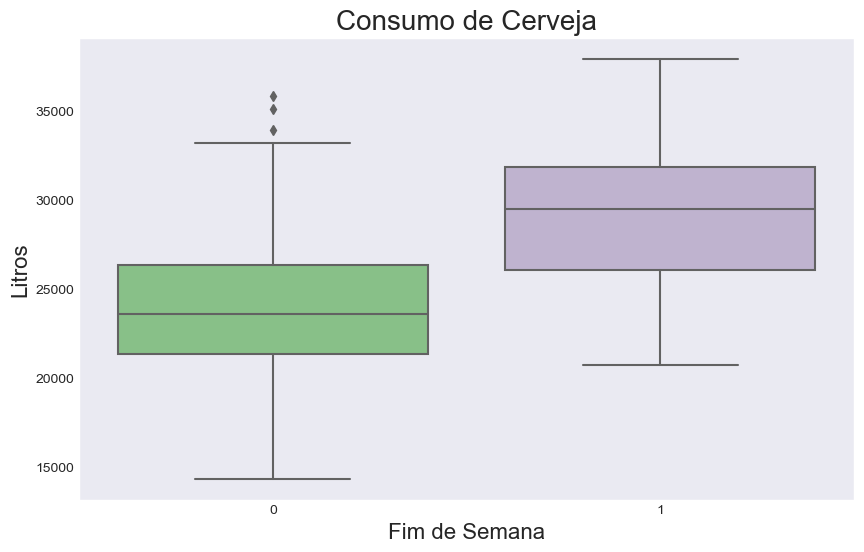

In [17]:
ax = sns.boxplot(y='consumo', x='fds', data=dados)
ax.figure.set_size_inches(10, 6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16) 
ax.set_xlabel('Fim de Semana', fontsize=16) 

Observação: 
 - É possível inferir, através do gráfico, que o consumo de cerveja nos finais de semana é mais elevado. Note que o 1º quartil, mediana e 3º quartil apresentam valores superiores quando o consumo é medido nos finais de semana, o que comprova esta afirmação.

 - Quando analisamos o consumo de cerveja fora dos finais de semana, notamos alguns valores discrepantes, que devem ser investigados com maior atenção. Estes valores acima do limite superior do box plot devem ser verificados com mais detalhes antes de serem classificados como outliers e eliminados da amostra.


### Distribuição de frequências 

#### Distribuição de frequências da variável *dependente* (y)

- Os métodos estatísticos mais conhecidos supõem que a variável dependente segue a distribuição normal
- Uma forma preliminar de se averiguar a hipótese de normalidade da variável dependente é através do histograma

C:\Users\lsantana\AppData\Local\Temp\ipykernel_22136\1139308794.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['consumo'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='consumo', ylabel='Consumo de Cerveja (Litros)'>

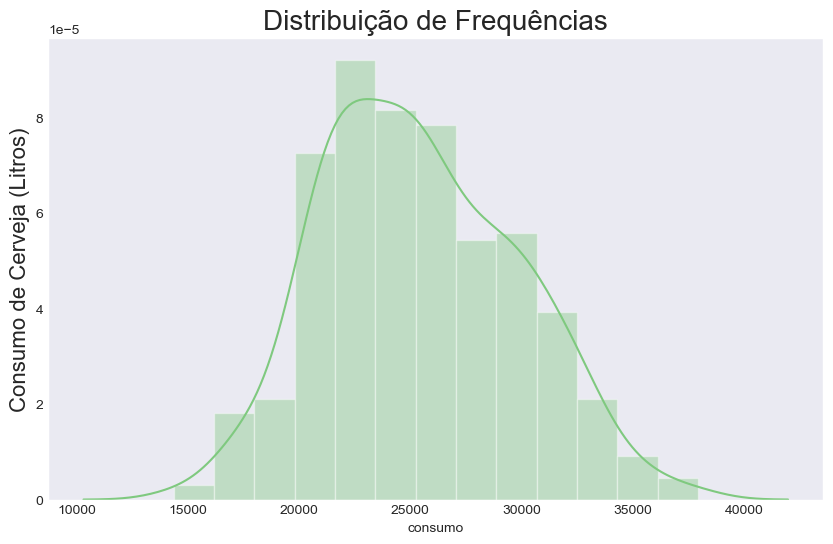

In [19]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(10, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16) 
ax